In [7]:
import os
import pickle
import random

import numpy as np
import cv2 as cv

from metrics import compute_distance
from histograms import compute_descriptor 
import evaluation
import utils

import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
def remove_background(img):
    """
    This method removes background from your image
    
    Processing flow: convert to grayscale -> denoise using Gaussian Blur -> adaptive threshold -> morphological transformations
    
    params:
        img: cv image to remove background
    return: 
        masked image after processed
    """
    
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    blurred = cv.GaussianBlur(gray, (11, 11), 0)

    thresholded = cv.adaptiveThreshold(blurred,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY_INV,11,2)

    kernel = cv.getStructuringElement(cv.MORPH_RECT, (11, 11))
    morph1 = cv.morphologyEx(thresholded, cv.MORPH_DILATE, kernel)
    morph2 = cv.morphologyEx(morph1, cv.MORPH_OPEN, kernel)
    morph3 = cv.morphologyEx(morph2, cv.MORPH_CLOSE, kernel)

    image, cnts, hierarchy = cv.findContours(morph3, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
    cnt = sorted(cnts, key = cv.contourArea)[-1]
    mask = cv.drawContours(thresholded, [cnt], 0, (255, 255, 255), cv.FILLED)

    masked = cv.bitwise_and(thresholded, thresholded, mask=mask)
    
    return masked

def retrieve_images(query):
    histograms = utils.load_database(descriptor, dataset_dir, database_dir)
    
    query_hist = cv.calcHist([query], [0], None, [256], [0, 256])
    query_hist = cv.normalize(query_hist, query_hist).flatten()
    
    k_nearest = utils.k_nearest_search(histograms, query_hist, -1, metric, k)
    
    print("{}-most similar images:".format(k))
    result = []
    for i, image in enumerate(k_nearest):
        print("{}. {}.jpg, score = {}".format(i + 1, str(image[-1]).zfill(5), image[0]))
        result.append(image[-1])         
    print("==================================")
    
    return result

In [34]:
dataset_dir = "{}/BBDD".format(os.getcwd()) # dataset path
queryset_dir = "{}/qst2_w1".format(os.getcwd()) 
database_dir = "{}/database".format(os.getcwd()) # database path
ground_truth = utils.load_pickle('./qsd2_w1/gt_corresps_2.pkl')
metric = 'euclidean'
descriptor = 'gray_histogram'
k = 10

query_set = [fname for fname in sorted(os.listdir(queryset_dir)) if fname.endswith(".jpg")]
results = []
for query in query_set:
    print(query)
    image = cv.imread(os.path.join(queryset_dir, query))   
    mask = remove_background(image)
    masked = cv.bitwise_and(cv.cvtColor(image, cv.COLOR_BGR2GRAY), cv.cvtColor(image, cv.COLOR_BGR2GRAY), mask = mask)
    result = retrieve_images(masked)
    results.append(result)
print(results)   

with open('{}/test_results/qst2/masks/result.pkl'.format(os.getcwd()), 'wb') as f:
    pickle.dump(results, f)     

00000.jpg
00001.jpg
00002.jpg
00003.jpg
00004.jpg
00005.jpg
00006.jpg
00007.jpg
00008.jpg
00009.jpg
00010.jpg
00011.jpg
00012.jpg
00013.jpg
00014.jpg
00015.jpg
00016.jpg
00017.jpg
00018.jpg
00019.jpg
00020.jpg
00021.jpg
00022.jpg
00023.jpg
00024.jpg
00025.jpg
00026.jpg
00027.jpg
00028.jpg
00029.jpg
[[180, 276, 79, 160, 283, 154, 248, 228, 273, 168], [180, 79, 276, 160, 283, 154, 248, 225, 81, 228], [180, 276, 79, 160, 283, 154, 273, 248, 168, 81], [180, 276, 79, 283, 160, 248, 154, 273, 228, 81], [180, 276, 79, 160, 283, 168, 154, 248, 273, 228], [180, 276, 79, 160, 154, 225, 130, 104, 140, 248], [180, 79, 276, 160, 283, 154, 248, 225, 228, 81], [180, 276, 160, 79, 283, 154, 273, 168, 248, 81], [180, 79, 276, 160, 283, 248, 154, 228, 273, 81], [180, 276, 79, 160, 154, 130, 104, 140, 57, 34], [180, 276, 160, 240, 79, 154, 171, 62, 179, 254], [180, 160, 276, 9, 26, 133, 218, 154, 99, 37], [180, 276, 79, 160, 154, 283, 248, 81, 168, 273], [180, 276, 160, 79, 154, 133, 81, 273, 113, 218], 

TypeError: Image data cannot be converted to float

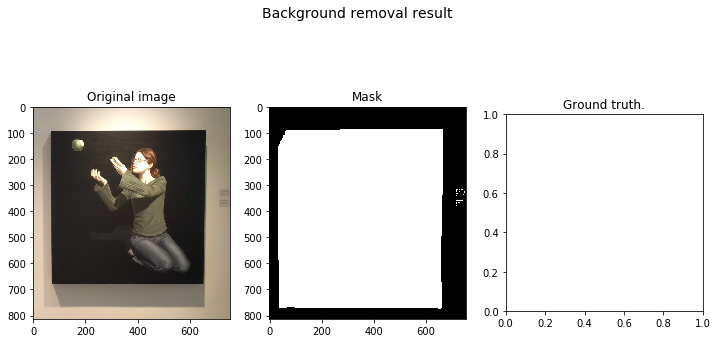

In [26]:
img_path = "{}/qst2_w1/{}.jpg".format(os.getcwd(), str(10).zfill(5))
fig, axs = plt.subplots(1, 3, figsize=(12, 6))
fig.suptitle('Background removal result', fontsize=14)

image = cv.imread(img_path)    
axs[0].set_title("Original image")
axs[0].imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
    
masked_data = remove_background(image)    
axs[1].set_title("Mask")
axs[1].imshow(masked_data, cmap=plt.get_cmap('gray'), vmin=0, vmax=255)

gt = cv.imread(img_path.replace("jpg", "png"))
axs[2].set_title("Ground truth.")
axs[2].imshow(gt, cmap=plt.get_cmap('gray'), vmin=0, vmax=255)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])